In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import nltk
import string

In [2]:
train = pd.read_csv("train_2kmZucJ.csv")
test = pd.read_csv("test_oJQbWVk.csv")

In [3]:
combi = train.append(test, ignore_index=True)
combi.shape

(9873, 3)

In [4]:
combi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9873 entries, 0 to 9872
Data columns (total 3 columns):
id       9873 non-null int64
label    7920 non-null float64
tweet    9873 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 231.5+ KB


In [5]:
combi.groupby('label').describe()

id                                                                 
        count         mean          std  min      25%     50%      75%     max
label                                                                         
0.0    5894.0  3954.497285  2290.734085  1.0  1971.25  3958.5  5927.50  7920.0
1.0    2026.0  3977.962981  2274.419827  5.0  2019.50  3968.5  5966.75  7914.0

In [6]:
combi['length']=combi['tweet'].apply(len)

In [7]:
combi.head()

id  label                                              tweet  length
0   1    0.0  #fingerprint #Pregnancy Test https://goo.gl/h1...     128
1   2    0.0  Finally a transparant silicon case ^^ Thanks t...     131
2   3    0.0  We love this! Would you go? #talk #makememorie...     123
3   4    0.0  I'm wired I know I'm George I was made that wa...     112
4   5    1.0  What amazing service! Apple won't even talk to...     124

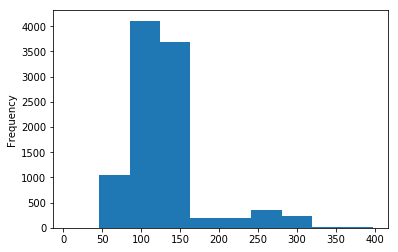

In [8]:
combi['length'].plot(kind='hist') 

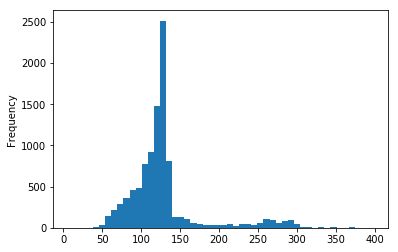

In [9]:
combi['length'].plot(bins=50, kind='hist') 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000009B4A828>,
      dtype=object)

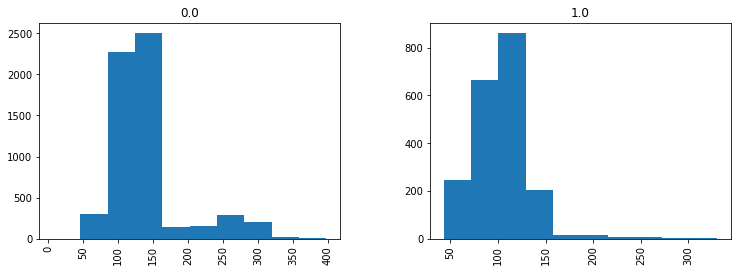

In [11]:
combi.hist(column='length', by='label',figsize=(12,4))

In [12]:
from nltk.corpus import stopwords

In [13]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [14]:
combi['tweet'].apply(text_process)

0       [fingerprint, Pregnancy, Test, httpsgooglh1MfQ...
1       [Finally, transparant, silicon, case, Thanks, ...
2       [love, Would, go, talk, makememories, unplug, ...
3       [Im, wired, know, Im, George, made, way, iphon...
4       [amazing, service, Apple, wont, even, talk, qu...
5       [iPhone, software, update, fucked, phone, big,...
6       [Happy, us, instapic, instadaily, us, sony, xp...
7       [New, Type, C, charger, cable, UK, httpwwwebay...
8       [Bout, go, shopping, listening, music, iphone,...
9       [Photo, fun, selfie, pool, water, sony, camera...
10      [hey, apple, make, new, ipod, dont, make, new,...
11      [Ha, heavy, machinery, need, Apple, really, dr...
12      [Contemplating, giving, iPhone, bandwagon, sim...
13      [made, another, crazy, purchase, lol, theory, ...
14      [shaqlockholmes, samlouise1991, battery, painf...
15      [DeepEllum, towards, downtown, Dallas, BigD, S...
16      [Like, Share, want, 3D, Phone, Case, Iphone, i...
17      [Go, c

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(combi['tweet'])


print(len(bow_transformer.vocabulary_))

31436


In [17]:
messages_bow = bow_transformer.transform(combi['tweet'])

In [18]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (9873, 31436)
Amount of Non-Zero occurences:  119876


In [20]:
messages_bow

<9873x31436 sparse matrix of type '<class 'numpy.int64'>'
	with 119876 stored elements in Compressed Sparse Row format>

In [21]:
print (messages_bow)

  (0, 6601)	1
  (0, 8214)	1
  (0, 9756)	1
  (0, 9999)	1
  (0, 10533)	1
  (0, 12429)	1
  (0, 13899)	1
  (0, 15323)	1
  (0, 19151)	1
  (0, 21020)	1
  (0, 21655)	1
  (0, 21743)	1
  (0, 21763)	1
  (1, 3332)	1
  (1, 7710)	1
  (1, 8229)	1
  (1, 9121)	1
  (1, 11491)	1
  (1, 16445)	1
  (1, 27750)	1
  (1, 28144)	1
  (1, 29516)	1
  (1, 29816)	1
  (1, 30866)	1
  (2, 9075)	1
  :	:
  (9870, 14970)	1
  (9870, 26297)	1
  (9870, 26935)	1
  (9870, 27379)	2
  (9870, 30744)	1
  (9871, 981)	1
  (9871, 9899)	1
  (9871, 10721)	1
  (9871, 11909)	1
  (9871, 21210)	1
  (9871, 23277)	1
  (9871, 27165)	1
  (9871, 29328)	1
  (9871, 30423)	1
  (9872, 3332)	1
  (9872, 7288)	1
  (9872, 13738)	2
  (9872, 14434)	1
  (9872, 14668)	1
  (9872, 14898)	1
  (9872, 18119)	1
  (9872, 24180)	1
  (9872, 25142)	1
  (9872, 27121)	1
  (9872, 29164)	1


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [23]:
train.shape

(7920, 3)

In [36]:
train_bow = messages_bow[:7920,:]
test_bow = messages_bow[7920:,:]

xtrain, xtest, ytrain, ytest = train_test_split(train_bow, train['label'],random_state=42,test_size=0.3)

In [37]:
lreg = LogisticRegression()
lreg.fit(xtrain, ytrain) 

prediction = lreg.predict_proba(xtest) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int)

f1_score(ytest, prediction_int) 

0.7906316536550745

In [38]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('face_log_42.csv', index=False)

In [39]:
prediction = lreg.predict(xtest)

f1_score(ytest,prediction)

0.7425742574257425

In [40]:
test_pred = lreg.predict(test_bow)

test['label'] = test_pred

submission = test[['id','label']]
submission.to_csv('face_log_without_int_42.csv',index=False)

In [42]:
from sklearn.svm import SVC

In [46]:
svm = SVC(probability=True)

In [47]:
svm.fit(xtrain,ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [48]:
prediction = svm.predict_proba(xtest)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(ytest, prediction_int)

0.763157894736842

In [49]:
test_pred = svm.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('face_svm_42.csv', index=False)

In [50]:
prediction = svm.predict(xtest)
f1_score(ytest, prediction)

0.0

In [51]:
xtrain, xtest, ytrain, ytest = train_test_split(train_bow, train['label'],test_size=0.3)

In [52]:
from sklearn.svm import SVC

svm = SVC(probability=True)

svm.fit(xtrain,ytrain)

prediction = svm.predict_proba(xtest)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(ytest, prediction_int)

0.7183499288762446

In [53]:
test_pred = svm.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('face_svm.csv', index=False)

In [54]:
svm = SVC()

In [55]:
svm.fit(xtrain,ytrain)

prediction = svm.predict(xtest)
f1_score(ytest, prediction)

0.0

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rf = RandomForestClassifier().fit(xtrain, ytrain)

prediction = rf.predict(xtest)
f1_score(ytest, prediction)

0.5766871165644172

In [58]:
from sklearn.ensemble import AdaBoostClassifier

In [59]:
clf = AdaBoostClassifier()

In [60]:
clf.fit(xtrain,ytrain)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [61]:
prediction = clf.predict(xtest)
f1_score(ytest,prediction)

0.6137667304015297

In [62]:
test_pred = clf.predict(test_bow)
test['label'] = test_pred
submission = test[['id','label']]
submission.to_csv('face_ada.csv', index=False)

In [66]:
clf = AdaBoostClassifier(base_estimator = lreg)

In [67]:
clf.fit(xtrain,ytrain)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=None)

In [68]:
prediction = clf.predict(xtest)
f1_score(ytest,prediction)

0.5299334811529933

In [69]:
test_pred = clf.predict(test_bow)
test['label'] = test_pred
submission = test[['id','label']]
submission.to_csv('face_ada_log.csv', index=False)

In [70]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [71]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(9873, 31436)


In [73]:
train_tfidf = messages_tfidf[:7920,:]
test_tfidf = messages_tfidf[7920:,:]

xtrain, xtest, ytrain, ytest = train_test_split(train_tfidf, train['label'],test_size=0.3)

In [74]:
lreg.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [75]:
prediction = lreg.predict_proba(xtest) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int)

f1_score(ytest, prediction_int) 


0.7602941176470588

In [76]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('face_log_tfidf.csv', index=False)

In [77]:
xtrain, xtest, ytrain, ytest = train_test_split(train_tfidf, train['label'],random_state=42,test_size=0.3)

In [78]:
lreg.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [79]:
prediction = lreg.predict_proba(xtest) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int)

f1_score(ytest, prediction_int) 

0.7913043478260869

In [80]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('face_log_tfidf_42.csv', index=False)

In [81]:
prediction = lreg.predict(xtest) 


f1_score(ytest, prediction) 

0.6225296442687748